# Ensembling Technique

In [1]:
#Ensembling Technique : -
#There are different types of Ensembling technique
'''
1. Naive Aggregation 
a. Hard Voting      
b. Soft voting

2. Bootstrapping
a. Bagging   b. pasting   c.Random Forest Tree

3. Boosting Technique
a. ADA Boost (Adaptor Boosting)
b. Gradient Boosting
c. Extreme Gradient Boosting(XG Boost)

4. Stacking
'''

'\n1. Naive Aggregation \na. Hard Voting      \nb. Soft voting\n\n2. Bootstrapping\na. Bagging   b. pasting   c.Random Forest Tree\n\n3. Boosting Technique\na. ADA Boost (Adaptor Boosting)\nb. Gradient Boosting\nc. Extreme Gradient Boosting(XG Boost)\n\n4. Stacking\n'

In [2]:
#Ensembling Technique : -
#Bootstraping
#RandomForestTree
#work on dataset bank.csv
#Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To load dataset
df = pd.read_csv("bank (1).csv")

In [4]:
#To display first 5 record
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [5]:
#To check null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
#Cross check with data type
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [7]:
#To check duplicates row
df.duplicated().sum()

0

In [8]:
#Here target : deposite that means we predict whether the customer will
#subscribe the term deposit or not

In [9]:
#How many category in deposite column
df["deposit"].unique()

array([1, 0], dtype=int64)

In [10]:
#How many sample for 1 and 0 in target column deposit
f = df["deposit"].value_counts()
f

0    5873
1    5289
Name: deposit, dtype: int64

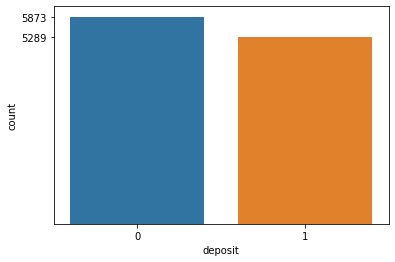

In [11]:
#Visualise form
sb.countplot(data=df,x='deposit')
plt.yticks(f)
plt.show()

In [12]:
#select input and output from given dataset
x = df.drop('deposit',axis=1)    #input
y = df['deposit']    #output

In [13]:
#split the data
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=1)

In [15]:
x_train.shape , y_train.shape

((7813, 16), (7813,))

In [16]:
x_test.shape , y_test.shape

((3349, 16), (3349,))

In [17]:
#Apply scaling on input x_train and x_test
from sklearn.preprocessing import StandardScaler 

In [18]:
#create object for StandardScaler class
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [19]:
#create user define function
def create_model(model):
    model.fit(x_train,y_train) #train the model with 70% data
    y_pred = model.predict(x_test)  #model test with 30% data
    
    #generate Report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    
    return model

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
#Frist use LogisticRegression Alog

In [22]:
#call inbuilt class LogisticRegression
from sklearn.linear_model import LogisticRegression

In [23]:
#create object for LogisticRegression class
lr = LogisticRegression()

In [24]:
#call function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1441  319]
 [ 359 1230]]


In [25]:
#got recall 0.77(77%) , it is good but not better.

In [26]:
#Second DecisionTreeClassifier with gini index
#Now, give data in the next classification algo. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
#create object for DecisionTreeClassifier class
dtc = DecisionTreeClassifier(random_state=1)
#by default GINI Index

In [28]:
#call function
dtc = create_model(dtc)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1407  353]
 [ 372 1217]]


In [29]:
#Check information gain :
dict = {"Input":x.columns,"IG":dtc.feature_importances_}
df1 = pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,duration,0.354008
1,month,0.098357
2,balance,0.084437
3,age,0.077136
4,day,0.076581
5,contact,0.061793
6,pdays,0.047856
7,housing,0.042620
8,poutcome,0.036110
9,job,0.034220


In [30]:
#Create a tree
#import the inbuilt class tree from sklearn
from sklearn import tree

feature = x.columns

plt.figure(figsize=(50,50))
#_ = tree.plot_tree(dtc,feature_names=feature,filled=True)
plt.show()

<Figure size 3600x3600 with 0 Axes>

In [31]:
#But we got less score 0.77 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter of DecisionTreeClassifier class
#2. min_samples_leaf  : inbuilt parameter of DecisionTreeClassifier class

In [32]:
#Apply Pruning technique :
#1.max_depth : the value of max depth cannot be more the 8 i.e. means<=8
#create object for DecisionTreeClassifier class with gini index and use parameter max_depth
#To remove overfitting

#let use loop for checking the value of max_depth
for i in range(1,9):
    dtc = DecisionTreeClassifier(random_state=1,max_depth=i)  #by default gini index
    print("Max Depth:",i)
    #call function
    dtc = create_model(dtc)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1760
           1       0.71      0.86      0.78      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.78  

In [33]:
#We use max_depth = 5
dtc2 = DecisionTreeClassifier(random_state=1,max_depth=5)
#call function
dtc2 = create_model(dtc)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1760
           1       0.81      0.80      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1465  295]
 [ 312 1277]]


In [34]:
#check information gain:
dict1 = {"Input":x.columns,"IG":dtc2.feature_importances_}
df2 = pd.DataFrame(dict1)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,duration,0.477684
1,contact,0.101254
2,month,0.083332
3,housing,0.069480
4,pdays,0.064248
5,poutcome,0.057849
6,age,0.049757
7,day,0.030163
8,previous,0.022758
9,balance,0.020437


In [35]:
#2.Now using 2nd purning tectnique: min_samples_leaf 
#its an inbuilt parameter of DecisionTreeClassifier class , it is also use to remove overfitting
#Leaf means no tree
#create an object for DecisionTreeClassifier class
#1st apply loop for check the value in min_samples_leaf
for i in range(45,101):
    dt3 = DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Min samples leaf:",i)
    #call function
    dt3 = create_model(dt3)

Min samples leaf: 45
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1379  381]
 [ 204 1385]]
Min samples leaf: 46
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1379  381]
 [ 204 1385]]
Min samples leaf: 47
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro av

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1402  358]
 [ 257 1332]]
Min samples leaf: 68
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1760
           1       0.80      0.83      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1425  335]
 [ 269 1320]]
Min samples leaf: 69
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1760
           1       0.80      0.83      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.8

[[1403  357]
 [ 279 1310]]
Min samples leaf: 89
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1760
           1       0.79      0.82      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1403  357]
 [ 279 1310]]
Min samples leaf: 90
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1760
           1       0.79      0.82      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1403  357]
 [ 279 1310]]
Min samples leaf: 91
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1760
           1       0.79      0.82      0.80      1589

    accuracy                          

In [36]:
#we use min_samples_depth=45
dt3 = DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#Call function
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1379  381]
 [ 204 1385]]


In [37]:
#check information gain
dict = {"Input":x.columns,"IG":dt3.feature_importances_}
df3 = pd.DataFrame(dict)
df3.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.496317
1,month,0.109126
2,contact,0.105357
3,housing,0.068329
4,poutcome,0.059375
5,pdays,0.044066
6,age,0.043918
7,previous,0.036294
8,balance,0.021749
9,day,0.005046


In [38]:
#Here recall value is 0.87 maens 87% (DTC with GINI Index)

In [39]:
#Next DecisionTreeClassifier with Entropy
#1st create an object for DecisionTreeClassifier class
dt_entropy = DecisionTreeClassifier(random_state=1,criterion="entropy")
#by default its take gini index , if not given

In [40]:
#call function
dt_entropy = create_model(dt_entropy)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1760
           1       0.79      0.75      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1433  327]
 [ 394 1195]]


In [41]:
#check information gain :
dict2 = {"Input":x.columns,"IG":dt_entropy.feature_importances_}
df4 = pd.DataFrame(dict2)
df4.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.311218
1,month,0.110721
2,balance,0.094507
3,day,0.090688
4,age,0.086951
5,contact,0.076067
6,pdays,0.046928
7,housing,0.032042
8,job,0.028838
9,campaign,0.027159


In [42]:
#create a tree 
features = x.columns

plt.figure(figsize=(20,20))
#_ = tree.plot_tree(dt_entropy,feature_names=features,filled=True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

In [43]:
#we got less score 75% its good but not excellent, reason behind the score is overfitting
#means model is overfit so to reduce the overfitting situation we use pruning tech.
#i.e. max_depth and min_samples_leaf

#by using max_depth between range 1 to 8 we use loop 
for i in range(1,9):
    dt1_entropy = DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")
    print("Max Depth:",i)
    #call function
    dt1_entropy = create_model(dt1_entropy)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76  

In [44]:
#we use max_depth=6 
dt1 = DecisionTreeClassifier(random_state=1,max_depth=6,criterion="entropy")
#call function
dt1_entropy = create_model(dt1_entropy)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1760
           1       0.80      0.79      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1449  311]
 [ 330 1259]]


In [45]:
#check information gain
dict3 = {"Input":x.columns,"IG":dt1_entropy.feature_importances_}
df5 = pd.DataFrame(dict3)
df5.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.472495
1,contact,0.141147
2,month,0.125603
3,pdays,0.072249
4,housing,0.054594
5,age,0.033594
6,poutcome,0.029269
7,day,0.024655
8,balance,0.015845
9,job,0.010456


In [46]:
#Now using 2nd pruning technique : min_samples_leaf
#to check the min samples leaf between 45 to 100 we use loop
for i in range(45,101):
    dt2_entropy = DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion="entropy")
    print("Min sample leaf:",i)
    #call the function
    dt2_entropy = create_model(dt2_entropy)

Min sample leaf: 45
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1438  322]
 [ 283 1306]]
Min sample leaf: 46
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1438  322]
 [ 283 1306]]
Min sample leaf: 47
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1760
           1       0.80      0.83      0.82      1589

    accuracy                           0.82      3349
   macro avg  

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1442  318]
 [ 296 1293]]
Min sample leaf: 68
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1760
           1       0.80      0.83      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1428  332]
 [ 278 1311]]
Min sample leaf: 69
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1760
           1       0.80      0.83      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82 

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1760
           1       0.77      0.84      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1358  402]
 [ 250 1339]]
Min sample leaf: 92
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1760
           1       0.77      0.84      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1358  402]
 [ 250 1339]]
Min sample leaf: 93
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1760
           1       0.77      0.84      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81 

In [47]:
#We use min_samples_leaf=49 
dt2_entropy = DecisionTreeClassifier(random_state=1,min_samples_leaf=49,criterion="entropy")
#call the function
dt2_entropy = create_model(dt2_entropy)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.83      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1442  318]
 [ 274 1315]]


In [48]:
#Here recall score is 83% which is less comapre to gini index 
#for now GINI Index is good compare to Entropy Index

In [49]:
#Check information gain of entropy:
dict4 = {"Input":x.columns,"IG":dt2_entropy.feature_importances_}
df6 = pd.DataFrame(dict4)
df6.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.508748
1,contact,0.143871
2,month,0.108639
3,pdays,0.061645
4,housing,0.059954
5,balance,0.029745
6,poutcome,0.025663
7,age,0.020506
8,day,0.014908
9,job,0.009614


In [50]:
#Now Applying the RandomForestTree of Boosting Ensembling

In [51]:
#Apply Random Forest Tree : It is Boostraping Ensembling Technique
#It is work with Bagging classifier Boostraping Ensembling Tech.
#In RandomForestTree : Train the dataset on multiple DecisionTree Alogrithm
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Ensemble means to train random dataset on multiple Algorithm.

In [53]:
#create object for RandomForestClassifier class
for i in range(10,101):
    rfc = RandomForestClassifier(n_estimators=i,random_state=1)
    print("No. of Decision Tree:",i)
    
    #call funtion
    rfc = create_model(rfc)
    
#here n_estimators means take how many no. of decisiontree

#n_estimators >= 10 but n_estimators <= 100

No. of Decision Tree: 10
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1467  293]
 [ 301 1288]]
No. of Decision Tree: 11
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1425  335]
 [ 243 1346]]
No. of Decision Tree: 12
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.82      1589

    accuracy                           0.82      3349

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

[[1440  320]
 [ 229 1360]]
No. of Decision Tree: 33
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

[[1427  333]
 [ 208 1381]]
No. of Decision Tree: 34
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1760
           1       0.81      0.86      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

[[1437  323]
 [ 206 1383]]
No. of Decision Tree: 55
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349

[[1429  331]
 [ 194 1395]]
No. of Decision Tree: 56
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84 

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1444  316]
 [ 194 1395]]
No. of Decision Tree: 77
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1437  323]
 [ 188 1401]]
No. of Decision Tree: 78
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.85      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349

[[1432  328]
 [ 194 1395]]
No. of Decision Tree: 99
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349

[[1427  333]
 [ 191 1398]]
No. of Decision Tree: 100
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85

In [54]:
rfc = RandomForestClassifier(n_estimators=61,random_state=1)
#By default gini index
#call function
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.85      0.84      0.84      3349

[[1429  331]
 [ 196 1393]]


In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [56]:
dict5 = {"Input":x.columns , "IG":rfc.feature_importances_}
#feature_importances_ inbuilt method of RandomForestClassifier class
#To show information gain each input

df6 = pd.DataFrame(dict5)
df6.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.361433
1,balance,0.088253
2,age,0.087126
3,month,0.083450
4,day,0.071436
5,pdays,0.051406
6,job,0.039788
7,contact,0.038709
8,poutcome,0.038642
9,housing,0.033713


In [57]:
#Apply pruning technique max_depth 
for i in range(1,9):
    rfc1 = RandomForestClassifier(n_estimators=61,random_state=1,max_depth=i)
    #by default gini index
    #call function
    print("Max Depth:",i)
    rfc1 = create_model(rfc1)

Max Depth: 1
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1760
           1       0.70      0.40      0.51      1589

    accuracy                           0.63      3349
   macro avg       0.66      0.62      0.61      3349
weighted avg       0.65      0.63      0.62      3349

[[1485  275]
 [ 948  641]]
Max Depth: 2
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1760
           1       0.74      0.74      0.74      1589

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349

[[1351  409]
 [ 419 1170]]
Max Depth: 3
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80  

In [58]:
rfc1 = RandomForestClassifier(n_estimators=61,random_state=1,max_depth=8)
#By default gini index
#call function
rfc1 = create_model(rfc1)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1428  332]
 [ 232 1357]]


In [59]:
dict6 = {"Input":x.columns , "IG":rfc1.feature_importances_}

df7 = pd.DataFrame(dict6)
#sorting
df7.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.483505
1,pdays,0.069499
2,poutcome,0.069024
3,month,0.065383
4,contact,0.063512
5,age,0.052272
6,housing,0.049891
7,balance,0.041654
8,previous,0.026522
9,day,0.024869


In [60]:
#Applying Purning technique min_samples_leaf
#between 45 to 100 for that use for loop
for i in range(45,101):
    rfc2 = RandomForestClassifier(n_estimators=61,random_state=1,min_samples_leaf=i)
    print("Min Sample Leaf :",i)
    #call function
    rfc2 = create_model(rfc2)

Min Sample Leaf : 45
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1416  344]
 [ 237 1352]]
Min Sample Leaf : 46
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1416  344]
 [ 239 1350]]
Min Sample Leaf : 47
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro av

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1760
           1       0.80      0.84      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1417  343]
 [ 253 1336]]
Min Sample Leaf : 68
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1760
           1       0.80      0.84      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1417  343]
 [ 251 1338]]
Min Sample Leaf : 69
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1760
           1       0.80      0.84      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.8

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.83      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.82      0.81      3349
weighted avg       0.82      0.81      0.81      3349

[[1404  356]
 [ 265 1324]]
Min Sample Leaf : 90
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.83      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1409  351]
 [ 274 1315]]
Min Sample Leaf : 91
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.83      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.8

In [61]:
rfc2 = RandomForestClassifier(n_estimators=61,random_state=1,min_samples_leaf=47)
#call function
rfc2 = create_model(rfc2)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1419  341]
 [ 237 1352]]


In [62]:
#check information gain :
dict7 = {"Input":x.columns,"IG":rfc2.feature_importances_}
df8 = pd.DataFrame(dict7)
df8.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.546932
1,poutcome,0.070974
2,pdays,0.067098
3,contact,0.064304
4,housing,0.055431
5,month,0.050217
6,age,0.042567
7,balance,0.026714
8,previous,0.025256
9,day,0.014090


In [63]:
#we get recall score 85% in RandomForestClassifier class
#while using pruning technique

In [64]:
#Applying Ensembling Technique Boosting
#1.Apply ADA Boost : Adaptor Boosting 
#call inbuilt class AdaBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier

In [65]:
#Create object for AdaBoostClassifier class 
#Ada Boost consist of decision stump (means one root node and two leaf nodes)
#leaf node maens no any child 
#ada boost consist of n_estimators between 1 to 13
#so we apply for loop to find best n_estimators
for i in range(1,14):
    ada = AdaBoostClassifier(n_estimators=i,random_state=1)
    print("n_estimators :",i)
    #call function
    ada = create_model(ada)

n_estimators : 1
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
n_estimators : 2
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1760
           1       0.72      0.72      0.72      1589

    accuracy                           0.73      3349
   macro avg       0.73      0.73      0.73      3349
weighted avg       0.73      0.73      0.73      3349

[[1313  447]
 [ 450 1139]]
n_estimators : 3
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76

In [66]:
#From above for loop n_estimators=3 is best recall score
ada = AdaBoostClassifier(n_estimators=3,random_state=1)
#call function
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349

[[1262  498]
 [ 310 1279]]


In [67]:
#create information gain
dict8 = {"Input":x.columns,"IG":ada.feature_importances_}
df9 = pd.DataFrame(dict8)
df9.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,duration,0.666667
1,contact,0.333333
2,age,0.000000
3,job,0.000000
4,marital,0.000000
5,education,0.000000
6,default,0.000000
7,balance,0.000000
8,housing,0.000000
9,loan,0.000000


In [68]:
#Apply LinearSVC
from sklearn.svm import LinearSVC

In [69]:
#create an object of LinearSVC class
svc = LinearSVC(random_state=1)   #Hard margin

In [70]:
#call function
svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1444  316]
 [ 364 1225]]


In [74]:
#got recall for 1 : 77% means it is good but not best
#suppose outlier in our dataset means model overfitted
#So reduce the overfit of model or remove outlier from given dataset 
#add some external error during training error means soft margin
#Means again create the object of class LinearSVC and passing parameter 
#C means error parameter , the value of C can be <=1

svc1 = LinearSVC(random_state=1,C=0.9) #soft margin

#call function
svc1 = create_model(svc1)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1445  315]
 [ 364 1225]]
